In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'ece143/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This is later used to use the IMDB reviews
%cd /content/drive/My\ Drive/$FOLDERNAME/

Mounted at /content/drive
/content/drive/My Drive/ece143


# import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('cleaned_data.csv', encoding='ISO-8859-1')
data.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Gender,Age,Work,Degree,Residence,Reference,Playstyle,GAD_T,SWL_T,SPIN_T
0,0,0,0,0,0,0,0,Not difficult at all,0,0,...,Male,25,Employed,BC,USA,Reddit,online real life friends,0,33,3.0
1,0,0,0,0,0,0,0,Not difficult at all,1,1,...,Male,18,CollegeStu,HS,USA,Reddit,online real life friends,0,31,23.0
2,0,0,0,1,0,1,0,Not difficult at all,5,3,...,Male,35,Employed,HS,Canada,Reddit,online strangers,2,13,33.0
3,0,0,0,0,0,0,1,Not difficult at all,2,5,...,Male,30,Employed,BC,Bosnia and Herzegovina,Reddit,All,1,19,8.0
4,3,3,3,2,0,1,3,Extremely difficult,6,6,...,Male,24,CollegeStu,HS,Germany,Other,online acquaintances,15,9,37.0


In [ ]:
df = data.copy()

In [ ]:
df = df[['Gender', 'Age', 'Work', 'Degree', 'Residence', 'Platform', 'earnings', 'whyplay', 'League', 'Reference', 'Playstyle',
                   'Game', 'Hours', 'Narcissism',
                   'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE',
                   'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5',
                   'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
                   'GAD_T', 'SWL_T', 'SPIN_T'
                  ]]

# GAD
* 0-4 points： No or minimal anxiety
* 5-9 points: Mild anxiety
* 10-14 points: Moderate anxiety
* 15-21 points: Severe anxiety

<ipython-input-6-0b7bfe41b0c3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(pd.cut(data['GAD_T'], bins=[-1, 4, 9, 14, 21], labels=['minimal', 'mild', 'moderate', 'severe']))['GAD_T'].count()


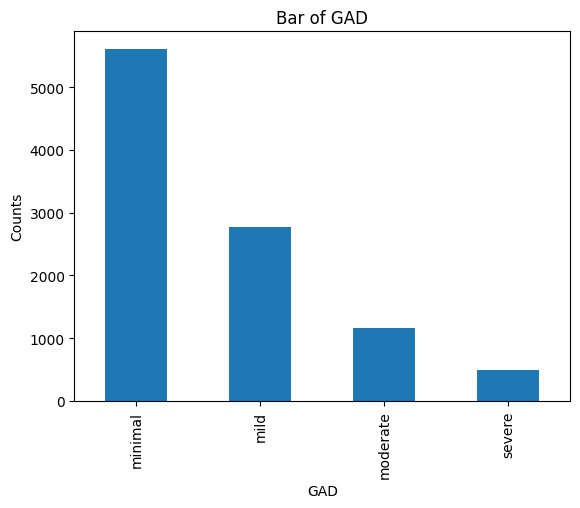

In [ ]:
group_counts = data.groupby(pd.cut(data['GAD_T'], bins=[-1, 4, 9, 14, 21], labels=['minimal', 'mild', 'moderate', 'severe']))['GAD_T'].count()

group_counts.plot(kind='bar')

plt.xlabel("GAD")
plt.ylabel("Counts")
plt.title("Bar of GAD")
plt.show()


In [ ]:
data['GAD_T'] = pd.cut(
    data['GAD_T'],
    bins=[-1, 4, 9, 14, 21], labels=['minimal', 'mild', 'moderate', 'severe']
).astype(str)

# GAD DecisionTreeClassifier

In [ ]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Age,Work,Degree,Residence,Platform,earnings,whyplay,League,Reference,...,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,GAD_T,SWL_T,SPIN_T
0,1,25,1,0,97,2,1,2,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33,3.0
1,1,18,0,2,97,2,1,1,7,2,...,3.0,2.0,0.0,1.0,1.0,1.0,1.0,0,31,23.0
2,1,35,1,2,15,2,1,2,7,2,...,3.0,2.0,2.0,2.0,2.0,1.0,1.0,2,13,33.0
3,1,30,1,0,11,2,1,1,7,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,19,8.0
4,1,24,0,2,32,2,1,1,2,1,...,3.0,3.0,1.0,1.0,3.0,1.0,1.0,15,9,37.0


In [ ]:
X_GAD = df.drop(columns=["GAD_T", "SWL_T", "SPIN_T"])
y_GAD = df['GAD_T']

X_train, X_test, y_train, y_test = train_test_split(X_GAD, y_GAD, random_state=42, test_size=0.2)

dtc = DecisionTreeClassifier(random_state=42, max_depth=10)
model = dtc.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[268,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 234,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 238,   1,   2,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   3, 199,   1,   2,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  11, 135,  24,  12,   1,   2,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   2,  25,  71,  32,   6,   3,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   6,  38,  56,  14,  11,   3,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   3,  16,  30,  38,  21,   2,   1,   0,   0,
          0,   0,   0,   0,   0,   0, 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       234
           2       0.99      0.98      0.98       243
           3       0.93      0.97      0.95       206
           4       0.78      0.73      0.75       186
           5       0.45      0.51      0.48       139
           6       0.34      0.44      0.38       128
           7       0.38      0.34      0.36       111
           8       0.21      0.30      0.25        80
           9       0.38      0.18      0.24        84
          10       0.27      0.22      0.24        60
          11       0.12      0.19      0.15        36
          12       0.18      0.18      0.18        38
          13       0.20      0.10      0.14        58
          14       0.33      0.23      0.27        44
          15       0.24      0.27      0.26        22
          16       0.20      0.21      0.20        24
          17       0.27    

In [ ]:
from tabulate import tabulate

features = pd.DataFrame(dtc.feature_importances_, index=X_GAD.columns, columns=['Importance'])
top_10_features = features.nlargest(10, 'Importance')

table_str = tabulate(top_10_features, headers=["Top 10 Features", "Importance"], tablefmt="grid")

table_lines = table_str.split("\n")
print("\n".join(table_lines))


+-------------------+--------------+
| Top 10 Features   |   Importance |
+===================+==============+
| GAD5              |   0.166166   |
+-------------------+--------------+
| GAD6              |   0.156721   |
+-------------------+--------------+
| GAD7              |   0.132934   |
+-------------------+--------------+
| GAD3              |   0.122632   |
+-------------------+--------------+
| GAD1              |   0.114083   |
+-------------------+--------------+
| GAD4              |   0.108319   |
+-------------------+--------------+
| GAD2              |   0.0887874  |
+-------------------+--------------+
| Hours             |   0.00944557 |
+-------------------+--------------+
| SPIN11            |   0.0057752  |
+-------------------+--------------+
| SWL2              |   0.00519291 |
+-------------------+--------------+


# GAD DecisionTreeRegressor

In [ ]:
X_GAD2 = df.iloc[:, :44]
y_GAD2 = df['GAD_T']

X_train, X_test, y_train, y_test = train_test_split(X_GAD2, y_GAD2, random_state=42, test_size=0.2)

dtr = DecisionTreeRegressor(random_state=42, max_depth=5)
model2 = dtr.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

In [ ]:
mean_absolute_error(y_pred2, y_test)

1.1185078044693457

In [ ]:
mean_squared_error(y_pred2, y_test)

2.279994763528169

In [ ]:
r2_score(y_pred2, y_test)

0.8765308814701749